# Análise de Dados das Eleições 

Esse notebook tem como objetivo fazer um análise e construir visualizações da dos relacionados às eleições. Para tal, serão utilizados os dados das eleições a partir do site [Base dos Dados](https://basedosdados.org). 

## Imports necessários 

Estão sendo utilizados os seguintes pacotes: 

* `basedosdados`: API do projeto Base dos Dados para acesso as base de dados e realizar consultas. 
* `pandas`: Biblioteca para manipulação das bases com python.
* `seaborn`: Biblioteca de visualização utilizando python. 

In [1]:
import pandas as pd
import basedosdados as bd
import seaborn as sns

## Sobre a análise

O objetivo é usar os dados das eleições para traçar o perfil dos candidados ao longo das últimas eleições. Para isso, serão utilizadas as seguintes tabelas:

* `basedosdados.br_tse_eleicoes.candidados`: para extrair a lista de candidados das últimas eleições. 
* `basedosdados.br_tse_eleicoes.resultados_candidatos`: para extrair informações como quantidade de votos e resultado. 
* `basedosdados.br_tse_eleicoes.bens_candidatos`: para extrair informações sobre o poder econômico. 
* `basedosdados.br_tse_eleicoes.receitas_candidatos`: para extrair informações sobre o investimento realizado nas campanhas. 

Para restringir os escopo de nossa análise vamos focar em algunas aspectos: 

* Serão analisados os dados somente do estado de Sergipe. No entanto, o código pode ser facilmente modificado para gerar análises de outros estados. 
* Vamos focar nos dados dos vereados por ter um maior número de candidados e consequentemente permitir uma melhor análise quando agruparamos esses dados. 
* As análises vão focar em enteder a distribuição dos candidados de acordo com a cor/raça, genêro e poder econômico (baseado nos bens declarados) 
* Informações de financiamento de campanha serão utilizados para entender em quais destes grupos os dados estão sendo aplicados. 


Vamos começar :) 

## Funções Auxiliares

In [2]:
def calculate_total_percent(data):
    for index, row in data.iterrows():
        sum_ = data.loc[index[0], 'id_candidato_bd'].sum()
        data.loc[index[0], 'total'] = int(sum_)

    data['porcentagem'] = data['id_candidato_bd']/data['total']
    data.reset_index(inplace=True)
    data.rename(columns={'id_candidato_bd': 'total_por_genero'},inplace=True)
    return data
    

## Consultas

### Análise para o cargo de prefeito 


#### Lista de Candidatos 


```sql
SELECT 
    b1.ano, b2.sigla_uf, b2.id_municipio, b1.tipo_eleicao, b1.id_candidato_bd, b1.nome_urna, b1.sigla_partido, 
    b1.cargo, b1.situacao, b2.resultado, b2.votos, b1.genero, b1.raca, b1.idade
FROM 
  `basedosdados.br_tse_eleicoes.candidatos` b1,
  `basedosdados.br_tse_eleicoes.resultados_candidato` b2
WHERE 
  b1.id_candidato_bd = b2.id_candidato_bd and b1.ano = b2.ano and b2.sigla_uf = 'SE' and b2.cargo = 'prefeito'
ORDER BY b1.ano, b1.id_candidato_bd;
```


In [4]:
query_prefeitos = """
SELECT 
    b1.ano, b2.sigla_uf, b2.id_municipio, b1.tipo_eleicao, b1.id_candidato_bd, b1.nome_urna, b1.sigla_partido, 
    b1.cargo, b1.situacao, b2.resultado, b2.votos, b1.genero, b1.raca, b1.idade
FROM 
  `basedosdados.br_tse_eleicoes.candidatos` b1,
  `basedosdados.br_tse_eleicoes.resultados_candidato` b2
WHERE 
  b1.id_candidato_bd = b2.id_candidato_bd and b1.ano = b2.ano and b2.sigla_uf = 'SE' and b2.cargo = 'prefeito'
ORDER BY b1.ano, b1.id_candidato_bd;

"""

In [5]:
df_candidatos_prefeitos = bd.read_sql(query=query_prefeitos,billing_project_id='adolfo-dev')

Downloading: 100%|██████████| 1319/1319 [00:00<00:00, 2272.19rows/s]


In [6]:
df_candidatos_prefeitos

,ano,sigla_uf,id_municipio,tipo_eleicao,id_candidato_bd,nome_urna,sigla_partido,cargo,situacao,resultado,votos,genero,raca,idade
0,2000,SE,2800506,eleicao ordinaria,1002210,Jeni Doria,PHS,prefeito,deferido,nao eleito,285,masculino,None,49
1,2000,SE,2806305,eleicao ordinaria,1011638,Dr. Ricardo,PMDB,prefeito,deferido,nao eleito,1487,masculino,None,36
2,2000,SE,2804003,eleicao ordinaria,1013598,Sérgio Vieira,PL,prefeito,deferido,nao eleito,205,masculino,None,35
3,2000,SE,2806503,eleicao ordinaria,101519,Paulo,PMDB,prefeito,deferido,nao eleito,900,masculino,None,68
4,2000,SE,2802106,eleicao ordinaria,1015453,Eduardo Abril,PT,prefeito,deferido,nao eleito,612,masculino,None,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2020,SE,2807501,eleicao ordinaria,928867,Vevé Da Farmácia,CIDADANIA,prefeito,deferido,nao eleito,206,masculino,branca,58
1315,2020,SE,2806909,eleicao ordinaria,934743,Alba De Ailton,MDB,prefeito,deferido,eleito,1698,feminino,branca,57
1316,2020,SE,2806701,eleicao ordinaria,937087,Gedalva Umbaubá,PSC,prefeito,deferido,nao eleito,12319,feminino,branca,57
1317,2020,SE,2803708,eleicao ordinaria,983561,Luciano De Vital,PSD,prefeito,deferido,nao eleito,2519,masculino,branca,55


#### Todos os candidatos

In [7]:
df_total_prefeitos = df_candidatos_prefeitos[['id_candidato_bd','ano','genero']].groupby(by=['ano','genero']).count()
df_total_prefeitos = calculate_total_percent(df_total_prefeitos)
df_total_prefeitos

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,12,199.0,0.060302
1,2000,masculino,187,199.0,0.939698
2,2004,feminino,21,193.0,0.108808
3,2004,masculino,172,193.0,0.891192
4,2008,feminino,34,215.0,0.158140
5,2008,masculino,181,215.0,0.841860
6,2012,feminino,36,218.0,0.165138
7,2012,masculino,182,218.0,0.834862
8,2016,feminino,41,250.0,0.164000
9,2016,masculino,209,250.0,0.836000


In [99]:
df_total_prefeitos.to_csv("../output/total_prefeitos_por_ano_genero.csv", index=False)

#### Candidatos Eleitos

In [8]:
df_query_prefeitos_eleitos = df_candidatos_prefeitos.query("resultado in ['eleito']", engine='python')
df_prefeitos_eleitos = df_query_prefeitos_eleitos[['id_candidato_bd','ano','genero']].groupby(by=['ano','genero']).count()
df_prefeitos_eleitos = calculate_total_percent(df_prefeitos_eleitos)
df_prefeitos_eleitos

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,5,74.0,0.067568
1,2000,masculino,69,74.0,0.932432
2,2004,feminino,8,74.0,0.108108
3,2004,masculino,66,74.0,0.891892
4,2008,feminino,14,82.0,0.170732
5,2008,masculino,68,82.0,0.829268
6,2012,feminino,12,77.0,0.155844
7,2012,masculino,65,77.0,0.844156
8,2016,feminino,13,78.0,0.166667
9,2016,masculino,65,78.0,0.833333


In [100]:
df_prefeitos_eleitos.to_csv("../output/total_prefeitos_eleitos_por_ano_genero.csv", index=False)

### Análise para o cargo de vereador

#### Lista de Candidatos

In [9]:
query_candidatos = """
SELECT 
    b1.ano, b2.sigla_uf, b2.id_municipio, b1.tipo_eleicao, b1.id_candidato_bd, b1.nome_urna, b1.sigla_partido, 
    b1.cargo, b1.situacao, b2.resultado, b2.votos, b1.genero, b1.raca, b1.idade
FROM 
  `basedosdados.br_tse_eleicoes.candidatos` b1,
  `basedosdados.br_tse_eleicoes.resultados_candidato` b2
WHERE 
  b1.id_candidato_bd = b2.id_candidato_bd and b1.ano = b2.ano and b2.sigla_uf = 'SE' and b2.cargo = 'vereador'
ORDER BY b1.ano, b1.id_candidato_bd;
"""

In [10]:
df_candidatos = bd.read_sql(query=query_candidatos,billing_project_id='adolfo-dev')

Downloading: 100%|██████████| 28308/28308 [00:06<00:00, 4629.05rows/s]


In [4]:
df_candidatos

,ano,sigla_uf,id_municipio,tipo_eleicao,id_candidato_bd,nome_urna,sigla_partido,cargo,situacao,resultado,votos,genero,raca,idade
0,2000,SE,2806305,eleicao ordinaria,1000073,João Donato Filho,PSDB,vereador,deferido,suplente,28,masculino,None,36.0
1,2000,SE,2804805,eleicao ordinaria,1002012,Galego Pedreiro,PGT,vereador,deferido,nao eleito,27,masculino,None,36.0
2,2000,SE,2800308,eleicao ordinaria,1002075,Ivanildo Da Silva,PTB,vereador,deferido,suplente,308,masculino,None,36.0
3,2000,SE,2807501,eleicao ordinaria,1002761,Vardo,PDT,vereador,deferido,suplente,71,masculino,None,54.0
4,2000,SE,2805604,eleicao ordinaria,1003666,Pedro Rodrigues De Souza,PSL,vereador,deferido,suplente,136,masculino,None,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28303,2020,SE,2803203,eleicao ordinaria,99864,Sandro Do Sapé,CIDADANIA,vereador,deferido,nao eleito,26,masculino,parda,37.0
28304,2020,SE,2801405,eleicao ordinaria,9991,José Calazans,PSB,vereador,deferido,nao eleito,101,masculino,parda,42.0
28305,2020,SE,2801702,eleicao ordinaria,999139,Bambam Do Povão,PT,vereador,deferido,suplente,115,feminino,parda,37.0
28306,2020,SE,2803500,eleicao ordinaria,999390,Telma Do Santo Antonio,PSD,vereador,deferido,suplente,34,feminino,parda,63.0


#### Todos os candidatos

In [95]:
df_total_vereadores = df_candidatos[['id_candidato_bd','ano','genero']].groupby(by=['ano','genero']).count()
df_total_vereadores = calculate_total_percent(df_total_vereadores)
df_total_vereadores

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,853,4372.0,0.195105
1,2000,masculino,3519,4372.0,0.804895
2,2004,feminino,943,4050.0,0.232840
3,2004,masculino,3107,4050.0,0.767160
4,2008,feminino,816,3700.0,0.220541
5,2008,masculino,2884,3700.0,0.779459
6,2012,feminino,1582,5000.0,0.316400
7,2012,masculino,3418,5000.0,0.683600
8,2016,feminino,1680,5106.0,0.329025
9,2016,masculino,3426,5106.0,0.670975


In [101]:
df_total_vereadores.to_csv("../output/total_vereadores_por_ano_genero.csv", index=False)

#### Candidatos Eleitos

In [96]:
df_query_vereadores_eleitos = df_candidatos.query("resultado in ['eleito por qp','eleito','eleito por media']", engine='python')
df_vereadores_eleitos = df_query_vereadores_eleitos[['id_candidato_bd','ano','genero']].groupby(by=['ano','genero']).count()
df_vereadores_eleitos = calculate_total_percent(df_vereadores_eleitos)
df_vereadores_eleitos

,ano,genero,total_por_genero,total,porcentagem
0,2000,feminino,136,797.0,0.170640
1,2000,masculino,661,797.0,0.829360
2,2004,feminino,115,693.0,0.165945
3,2004,masculino,578,693.0,0.834055
4,2008,feminino,103,695.0,0.148201
5,2008,masculino,592,695.0,0.851799
6,2012,feminino,122,795.0,0.153459
7,2012,masculino,673,795.0,0.846541
8,2016,feminino,129,801.0,0.161049
9,2016,masculino,672,801.0,0.838951


In [102]:
df_vereadores_eleitos.to_csv("../output/total_vereadores_eleitos_por_ano_genero.csv", index=False)

#### Recorte de Cor/Raça

A proposta agora é fazer um recorte dessas proporções para mulheres negras. 

In [110]:
df_total_vereadores_raca = df_candidatos.query("genero == 'feminino'")
df_total_vereadores_raca = df_total_vereadores_raca[['id_candidato_bd','ano','genero','raca']].groupby(by=['ano','genero','raca']).count()
df_total_vereadores_raca = calculate_total_percent(df_total_vereadores_raca)
df_total_vereadores_raca

,ano,genero,raca,total_por_genero,total,porcentagem
0,2016,feminino,amarela,14,1680.0,0.008333
1,2016,feminino,branca,385,1680.0,0.229167
2,2016,feminino,indigena,4,1680.0,0.002381
3,2016,feminino,parda,1131,1680.0,0.673214
4,2016,feminino,preta,146,1680.0,0.086905
5,2020,feminino,amarela,12,2063.0,0.005817
6,2020,feminino,branca,442,2063.0,0.214251
7,2020,feminino,indigena,3,2063.0,0.001454
8,2020,feminino,parda,1338,2063.0,0.648570
9,2020,feminino,preta,268,2063.0,0.129908


In [113]:
df_total_vereadores_raca.to_csv("../output/total_vereadores_por_ano_genero_raca.csv", index=False)

In [111]:
df_query_vereadores_eleitos_raca = df_candidatos.query("genero == 'feminino' and resultado in ['eleito por qp','eleito','eleito por media']", engine='python')
df_vereadores_eleitos_raca = df_query_vereadores_eleitos_raca[['id_candidato_bd','ano','genero','raca']].groupby(by=['ano','genero','raca']).count()
df_vereadores_eleitos_raca = calculate_total_percent(df_vereadores_eleitos_raca)
df_vereadores_eleitos_raca

,ano,genero,raca,total_por_genero,total,porcentagem
0,2016,feminino,branca,42,129.0,0.325581
1,2016,feminino,parda,84,129.0,0.651163
2,2016,feminino,preta,3,129.0,0.023256
3,2020,feminino,amarela,3,131.0,0.022901
4,2020,feminino,branca,35,131.0,0.267176
5,2020,feminino,indigena,1,131.0,0.007634
6,2020,feminino,parda,83,131.0,0.633588
7,2020,feminino,preta,9,131.0,0.068702


In [114]:
df_vereadores_eleitos_raca.to_csv("../output/total_vereadores_eleitos_por_ano_genero_raca.csv", index=False)

#### Recorte de Aracaju

In [97]:
df_vereadores_eleitos_aracaju = df_query_vereadores_eleitos.query("id_municipio == '2800308'")
df_vereadores_eleitos_aracaju.sort_values(by=['ano','votos'], inplace=True, ascending=[True, False])
df_vereadores_eleitos_aracaju

,ano,sigla_uf,id_municipio,tipo_eleicao,id_candidato_bd,nome_urna,sigla_partido,cargo,situacao,resultado,votos,genero,raca,idade
3785,2000,SE,2800308,eleicao ordinaria,829690,Barreto,PPS,vereador,deferido,eleito,4947,masculino,None,36.0
3271,2000,SE,2800308,eleicao ordinaria,722885,Chiquinho,PT,vereador,deferido,eleito,4729,masculino,None,44.0
3297,2000,SE,2800308,eleicao ordinaria,723744,Sérgio Carlos,PSDB,vereador,deferido,eleito,4046,masculino,None,42.0
2931,2000,SE,2800308,eleicao ordinaria,658924,Bomfim,PPS,vereador,deferido,eleito por media,3300,masculino,None,56.0
2827,2000,SE,2800308,eleicao ordinaria,626985,Carlos Magal,PT,vereador,deferido,eleito,3168,masculino,None,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,2020,SE,2800308,eleicao ordinaria,694328,Professora Ângela Melo,PT,vereador,deferido,eleito por qp,1882,feminino,amarela,64.0
24410,2020,SE,2800308,eleicao ordinaria,1591,Sgt. Byron Estrelas Do Mar,REPUBLICANOS,vereador,deferido,eleito por media,1743,masculino,parda,42.0
27736,2020,SE,2800308,eleicao ordinaria,774078,Paquito De Todos,SOLIDARIEDADE,vereador,deferido,eleito por media,1486,masculino,branca,59.0
22362,2020,SE,2800308,eleicao ordinaria,1038140,Cícero Do Santa Maria,PODE,vereador,deferido,eleito por media,1470,masculino,branca,57.0


In [103]:
df_vereadores_eleitos_aracaju.to_csv("../output/lista_vereadores_eleitos_aracaju_por_ano.csv", index=False)

#### Recorte por Partido

In [54]:
df_candidatos_2020 = df_candidatos.query("ano == 2020")
df_candidatos_2020 = df_candidatos_2020[['id_candidato_bd', 'sigla_partido', 'genero']]
df_candidatos_2020_total = df_candidatos_2020.groupby(by=['sigla_partido', 'genero']).count()
calculate_total_percent(df_candidatos_2020_total)

,sigla_partido,genero,total_por_genero,total,porcentagem
0,DEM,feminino,107,304.0,0.351974
1,DEM,masculino,197,304.0,0.648026
2,PC do B,feminino,55,171.0,0.321637
3,PC do B,masculino,116,171.0,0.678363
4,PCB,feminino,9,27.0,0.333333
5,PCB,masculino,18,27.0,0.666667
6,PDT,feminino,83,235.0,0.353191
7,PDT,masculino,152,235.0,0.646809
8,PHS,feminino,50,111.0,0.450450
9,PHS,masculino,61,111.0,0.549550


 ### Perfil do Eleitorado
 
 ```sql
 SELECT ano, genero, SUM(eleitores) as total FROM `basedosdados.br_tse_eleicoes.perfil_eleitorado_secao` 
 WHERE sigla_uf = 'SE' GROUP BY ano, genero 
 ORDER BY ano; 
 
 ```

In [59]:
query_eleitorado = """
SELECT ano, genero, SUM(eleitores) as total FROM `basedosdados.br_tse_eleicoes.perfil_eleitorado_secao` where sigla_uf = 'SE' group by ano, genero order by ano; 
"""

In [60]:
df_eleitorado = bd.read_sql(query=query_eleitorado,billing_project_id='adolfo-dev')

Downloading: 100%|██████████| 16/16 [00:00<00:00, 43.26rows/s]


In [61]:
df_eleitorado

,ano,genero,total
0,2008,masculino,655586
1,2008,feminino,713744
2,2008,nao informado,309
3,2010,masculino,681278
4,2010,feminino,744406
5,2010,nao informado,289
6,2012,feminino,735799
7,2012,masculino,650567
8,2014,masculino,685934
9,2014,feminino,768231


In [74]:
df_eleitorado_filter = df_eleitorado.query("ano in [2008, 2012, 2016, 2020]", engine='python')
df_eleitorado_filter.set_index(keys=['ano','genero'], inplace=True)
df_eleitorado_filter

total
ano  genero               
2008 masculino      655586
     feminino       713744
     nao informado     309
2012 feminino       735799
     masculino      650567
2016 masculino      728659
     feminino       811717
2020 feminino       852707
     masculino      757700

In [75]:
for index, row in df_eleitorado_filter.iterrows():
    sum_ = df_eleitorado_filter.loc[index[0], 'total'].sum()
    df_eleitorado_filter.loc[index[0], 'total_geral'] = int(sum_)

df_eleitorado_filter['porcentagem'] = df_eleitorado_filter['total']/df_eleitorado_filter['total_geral']
df_eleitorado_filter.reset_index(inplace=True)
df_eleitorado_filter.rename(columns={'total': 'total_por_genero', 'total_geral': 'total'},inplace=True)
df_eleitorado_filter


,ano,genero,total_por_genero,total,porcentagem
0,2008,masculino,655586,1369639.0,0.478656
1,2008,feminino,713744,1369639.0,0.521118
2,2008,nao informado,309,1369639.0,0.000226
3,2012,feminino,735799,1386366.0,0.530739
4,2012,masculino,650567,1386366.0,0.469261
5,2016,masculino,728659,1540376.0,0.473040
6,2016,feminino,811717,1540376.0,0.526960
7,2020,feminino,852707,1610407.0,0.529498
8,2020,masculino,757700,1610407.0,0.470502


### Análise das Receitas

```sql 
SELECT b1.ano, b1.sigla_uf, b1.id_candidato_bd, b1.cargo, b1.fonte_receita, b1.origem_receita, b1.natureza_receita, b1.valor_receita, b2.genero, b2.raca FROM 
    `basedosdados.br_tse_eleicoes.receitas_candidato` b1
INNER JOIN 
    `basedosdados.br_tse_eleicoes.candidatos` b2 
ON b1.id_candidato_bd = b2.id_candidato_bd
where b1.sigla_uf = 'SE' and b1.cargo = 'vereador'
ORDER BY b1.ano
LIMIT 100;
```

In [27]:
query_receitas = """
SELECT b1.ano, b1.sigla_uf, b1.id_candidato_bd, b1.cargo, b1.fonte_receita, b1.origem_receita, b1.natureza_receita, b1.valor_receita, b2.genero, b2.raca FROM 
    `basedosdados.br_tse_eleicoes.receitas_candidato` b1
INNER JOIN 
    `basedosdados.br_tse_eleicoes.candidatos` b2 
ON b1.id_candidato_bd = b2.id_candidato_bd
where b1.sigla_uf = 'SE' and b1.cargo = 'vereador'
ORDER BY b1.ano
"""

In [28]:
df_receitas = bd.read_sql(query=query_receitas,billing_project_id='adolfo-dev')

Downloading: 100%|██████████| 108932/108932 [00:11<00:00, 9413.86rows/s]


In [29]:
df_receitas

,ano,sigla_uf,id_candidato_bd,cargo,fonte_receita,origem_receita,natureza_receita,valor_receita,genero,raca
0,2008,SE,616606,vereador,None,recursos de partido politico,None,6000.0,masculino,None
1,2008,SE,616606,vereador,None,recursos proprios,None,20.0,masculino,None
2,2008,SE,616606,vereador,None,recursos de partido politico,None,2000.0,masculino,None
3,2008,SE,616606,vereador,None,recursos de partido politico,None,1000.0,masculino,None
4,2008,SE,616606,vereador,None,recursos de partido politico,None,3100.0,masculino,None
...,...,...,...,...,...,...,...,...,...,...
108927,2020,SE,1659921,vereador,fundo especial,recursos de outros candidatos,estimavel,158.0,masculino,branca
108928,2020,SE,1659921,vereador,outros recursos,recursos proprios,financeiro,500.0,masculino,branca
108929,2020,SE,1659921,vereador,outros recursos,recursos proprios,estimavel,1140.0,masculino,branca
108930,2020,SE,1659921,vereador,outros recursos,recursos de pessoas fisicas,financeiro,1000.0,masculino,branca


In [60]:
df_select = df_receitas.query("ano in [2016,2020]", engine='python')
df_select = df_select[['ano','id_candidato_bd','valor_receita','genero']]
df_select = df_select.groupby(by=['ano','id_candidato_bd','genero']).sum()
df_select = df_select.reset_index()
df_select

,ano,id_candidato_bd,genero,valor_receita
0,2016,100175,masculino,50.00
1,2016,1003688,masculino,2517.00
2,2016,1003695,feminino,3500.00
3,2016,1003695,masculino,700.00
4,2016,1003904,masculino,1040.00
...,...,...,...,...
9993,2020,99845,masculino,21630.00
9994,2020,99864,masculino,47.50
9995,2020,999139,feminino,250.00
9996,2020,999390,feminino,194.85


In [63]:
q_low = df_select["valor_receita"].quantile(0.01)
q_hi  = df_select["valor_receita"].quantile(0.99)

df_filtered = df_select[(df_select["valor_receita"] < q_hi) & (df_select["valor_receita"] > q_low)]
df_filtered

,ano,id_candidato_bd,genero,valor_receita
1,2016,1003688,masculino,2517.00
2,2016,1003695,feminino,3500.00
3,2016,1003695,masculino,700.00
4,2016,1003904,masculino,1040.00
5,2016,1003908,masculino,20252.10
...,...,...,...,...
9992,2020,99813,feminino,2400.00
9993,2020,99845,masculino,21630.00
9995,2020,999139,feminino,250.00
9996,2020,999390,feminino,194.85


In [104]:
df_filtered.to_csv("../output/lista_vereadores_receitas_por_ano.csv", index=False)

<AxesSubplot:title={'center':'valor_receita'}, xlabel='[ano, genero]'>

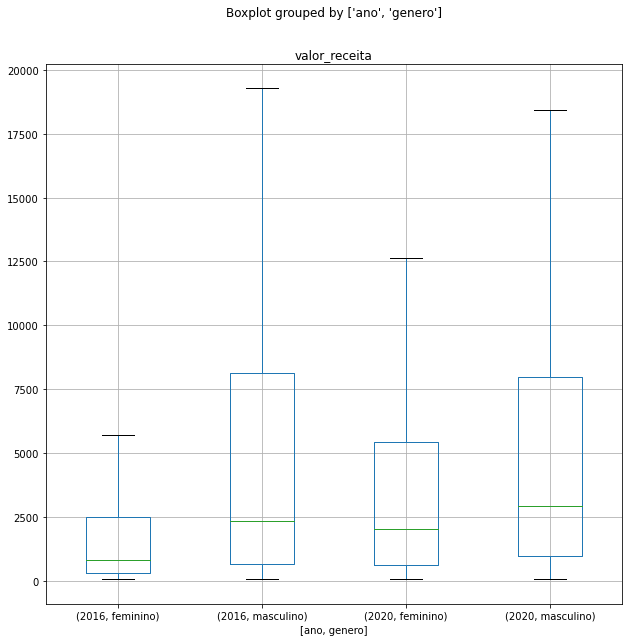

In [65]:
df_filtered.boxplot(column=['valor_receita'], by=['ano','genero'], figsize=(10,10), showfliers=False)

### Trash

In [16]:
df_candidatos[['id_candidato_bd','ano','raca']].groupby(by=['ano','raca']).count()

id_candidato_bd
ano  raca                     
2016 amarela                46
     branca               1070
     indigena               11
     parda                3465
     preta                 514
2020 amarela                27
     branca               1147
     indigena                7
     parda                3980
     preta                 839

In [32]:
df_query_eleitos[['id_candidato_bd','ano','raca']].groupby(by=['ano','raca']).count()

id_candidato_bd
ano  raca                     
2016 amarela                11
     branca                211
     parda                 541
     preta                  38
2020 amarela                 5
     branca                160
     indigena                1
     parda                 549
     preta                  76

In [22]:
df_eleitos_aracaju[['ano','genero','id_candidato_bd']].groupby(['ano','genero']).count()

id_candidato_bd
ano  genero                    
2000 feminino                 3
     masculino               18
2004 feminino                 2
     masculino               17
2008 feminino                 4
     masculino               15
2012 feminino                 2
     masculino               22
2016 feminino                 2
     masculino               22
2020 feminino                 4
     masculino               20

In [30]:
df_receitas['origem_receita'].value_counts()

recursos de pessoas fisicas              40922
recursos de outros candidatos            26669
recursos proprios                        24349
recursos de partido politico             16680
recursos de outros candidatos/comites      152
recursos de financiamento coletivo          78
recursos de origens nao identificadas       51
recursos de pessoas juridicas               20
doacoes pela internet                       11
Name: origem_receita, dtype: int64

<AxesSubplot:title={'center':'valor_receita'}, xlabel='[origem_receita]'>

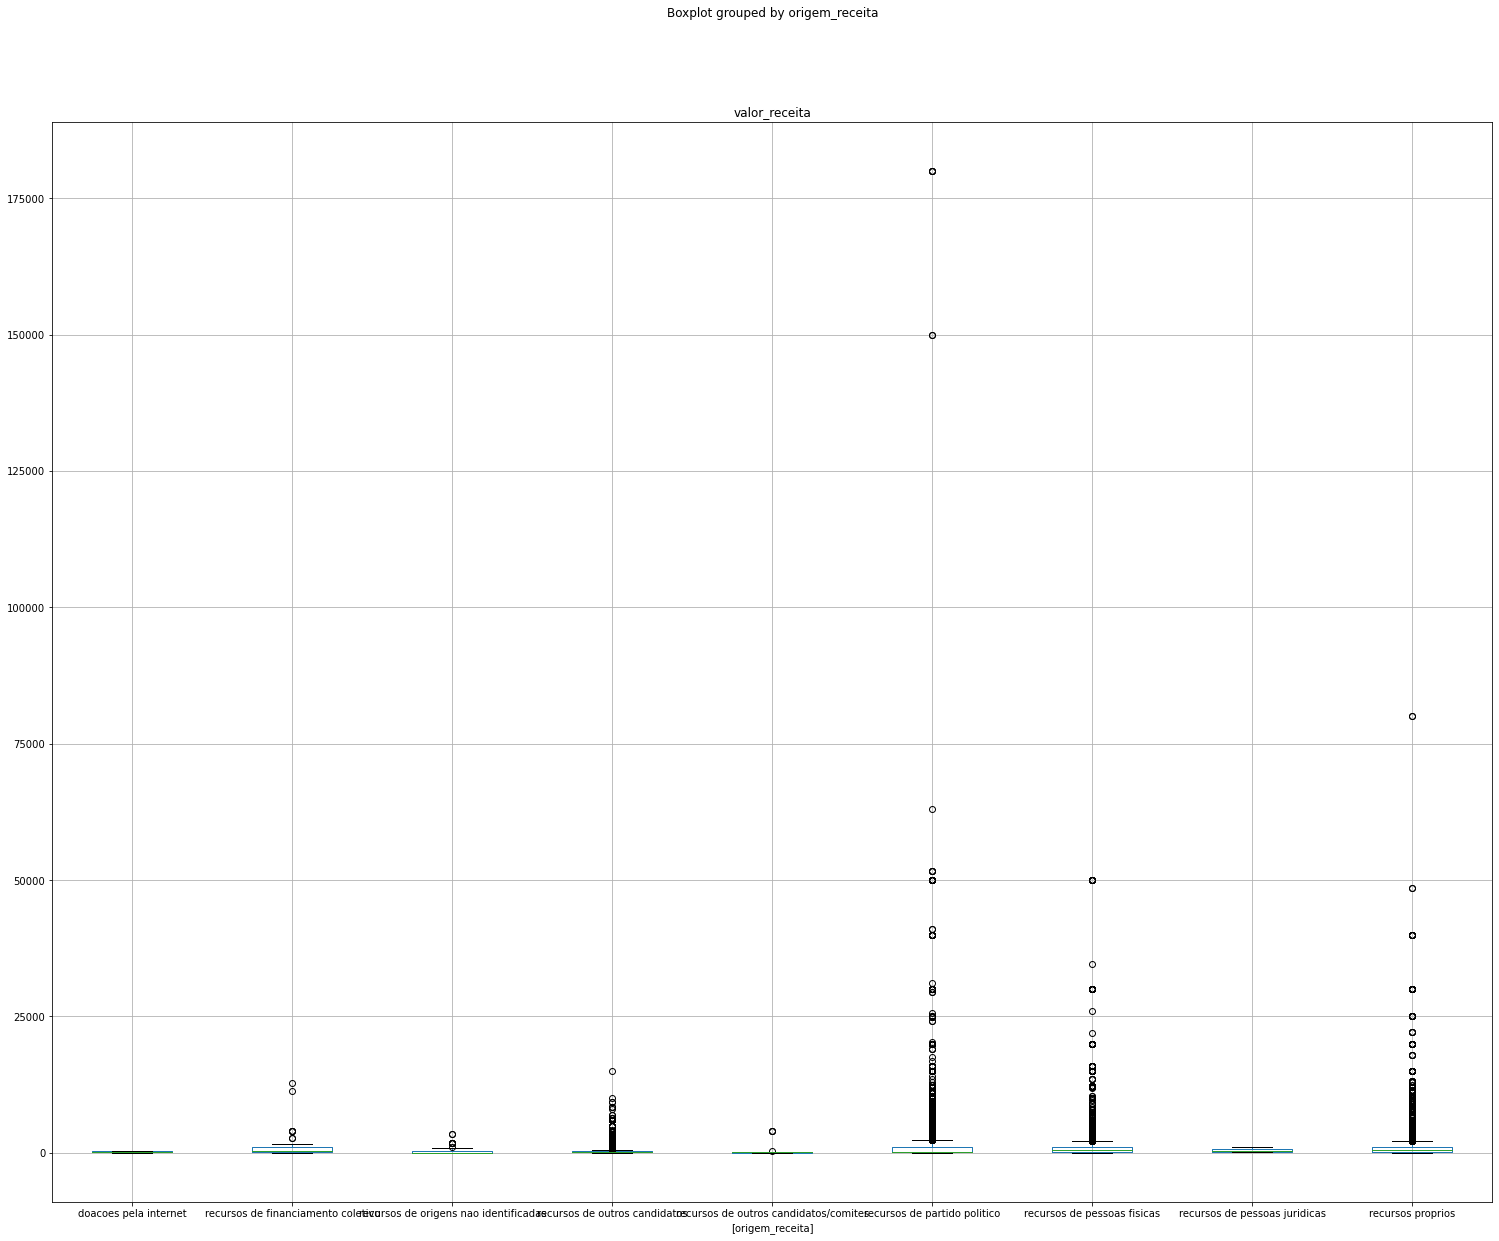

In [40]:
df_receitas.boxplot(column=['valor_receita'], by=['origem_receita'], figsize=(25,20))

<AxesSubplot:xlabel='valor_receita', ylabel='genero'>

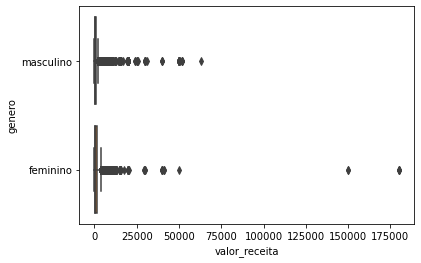

In [61]:
df_filter = df_receitas.query("origem_receita == 'recursos de partido politico'")
sns.boxplot(x=df_filter["valor_receita"], y=df_filter['genero'])

In [62]:
df_filter.query("genero == 'masculino'").describe()

,ano,valor_receita
count,12271.000000,12271.000000
mean,2018.530519,1225.325682
std,2.000129,3499.380925
min,2008.000000,0.090000
25%,2016.000000,71.430000
50%,2020.000000,165.000000
75%,2020.000000,927.000000
max,2020.000000,63000.000000


In [63]:
df_filter.query("genero == 'feminino'").describe()

,ano,valor_receita
count,4409.000000,4409.000000
mean,2019.041052,1787.894196
std,1.707885,7093.783877
min,2016.000000,0.020000
25%,2020.000000,71.430000
50%,2020.000000,198.000000
75%,2020.000000,1500.000000
max,2020.000000,180000.000000
